# Projet 5: BottleNeck

# Optimisez la gestion des données d'une boutique avec Python

In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

C:\Users\louis\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\louis\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\louis\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## I) Analyse préliminaire des fichiers

### 1) Fichier erp

In [3]:
#data exploration
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [4]:
#data exploration
#La fonction describe() est utilisée pour générer des statistiques descriptives qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de données, à l'exclusion des valeurs NaN.
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [5]:
# Verification s'il y a des doublons
erp.duplicated().sum()

0

In [6]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
#L’attribut  .shape permet de savoir combien de lignes et de colonnes comportent le data frame 
erp.shape

(825, 5)

In [8]:
# Nombre de valeurs uniques par colonne
erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [9]:
# La fonction pandas .drop_duplicates permet de renvoyer le dataFrame avec les lignes en double supprimées.
erp.drop_duplicates('product_id').size

4125

In [10]:
# la méthode .size permet de savoir le nombre d'éléments dans notre jeu de données
erp.size

4125

### 2) Fichier liaison

In [11]:
#data exploration
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [12]:
#data exploration
# df.info() imprime des infos sur le dataframe : les noms et types des colonnes, le nombre de valeurs non nulles et la place occupée.
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [13]:
#data exploration
liaison.describe(include='all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [14]:
# Renommer la colonne " id web " par " sku, pour pouvoir faire notre jointure par la suite
liaison.rename(columns={'id_web':'sku'}, inplace=True)

In [15]:
#Verification 
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [16]:
# On regarde s'il y a des doublons au niveau des lignes
liaison.duplicated().sum()

0

In [17]:
# On affiche le compte des valeurs uniques dans chaque colonne
liaison.nunique()

product_id    825
sku           734
dtype: int64

In [18]:
# Afficher le nombre de lignes et colonnes
liaison.shape

(825, 2)

In [19]:
# Afficher le nombre des valeurs manquantes pour chaque colonne
liaison.isna().sum()

product_id     0
sku           91
dtype: int64

In [20]:
# La fonction pandas .drop_duplicates permet de renvoyer le dataFrame avec les lignes en double supprimées
liaison.drop_duplicates('product_id').size

1650

In [21]:
liaison.size

1650

### 3) Fichier web

In [22]:
#data exploration
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
#La méthode .info() nous donne des informations sur le DataFrame.
# Les informations contiennent le nombre de colonnes, les étiquettes de colonne, les types de données de colonne, l'utilisation de la mémoire, l'index de plage et le nombre de cellules dans chaque colonne (valeurs non nulles).
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [24]:
web.describe(include='all')

C:\Users\louis\AppData\Local\Temp\ipykernel_44952\3552062975.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web.describe(include='all')
C:\Users\louis\AppData\Local\Temp\ipykernel_44952\3552062975.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web.describe(include='all')
C:\Users\louis\AppData\Local\Temp\ipykernel_44952\3552062975.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [25]:
# On supprime les colonnes qui ne contiennent aucune valeur
web = web.drop(columns=["tax_class", "post_content", "post_password", "post_content_filtered"])

In [26]:
# On supprime les doublons
web = web.drop_duplicates(keep = False)

In [27]:
# On regarde s'il y a des valeurs manquantes pour chaque colonne
web.isna().sum()

sku                    2
virtual                0
downloadable           0
rating_count           0
average_rating         0
total_sales            0
tax_status           714
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt         714
post_status            0
comment_status         0
ping_status            0
post_name              0
post_modified          0
post_modified_gmt      0
post_parent            0
guid                   0
menu_order             0
post_type              0
post_mime_type       716
comment_count          0
dtype: int64

In [28]:
# Détecte les valeurs manquantes 
web[web['sku'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 470 to 471
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            2 non-null      int64         
 2   downloadable       2 non-null      int64         
 3   rating_count       2 non-null      int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  post_title         2 non-null      object        
 11  post_excerpt       2 non-null      object        
 12  post_status        2 non-null      object        
 13  comment_status     2 non-null      object        
 14  ping_statu

In [29]:
# On affiche le nombre de valeurs uniques dans chaque colonne
web.nunique()

sku                   714
virtual                 1
downloadable            1
rating_count            1
average_rating          1
total_sales            41
tax_status              1
post_author             2
post_date             716
post_date_gmt         716
post_title            713
post_excerpt          679
post_status             1
comment_status          1
ping_status             1
post_name             716
post_modified         589
post_modified_gmt     589
post_parent             1
guid                 1430
menu_order              1
post_type               2
post_mime_type          1
comment_count           1
dtype: int64

In [31]:
# On regarde s'il y a des doublons au niveau des lignes
web.duplicated().sum()

0

In [32]:
# On supprime les doublons sur la colonne sku du DataFrame web.
web.drop_duplicates('sku').size

17160

In [33]:
web.size

34320

In [34]:
pd.set_option('display.max_columns', 85)

In [35]:
# La fonction Pandas Series.isnull() permet de détecter les valeurs manquantes dans l’objet de série donné.
sku_null=web[web['sku'].isnull()]

In [36]:
# La fonction Pandas dataframe.notnull() détecte les valeurs existantes/non manquantes dans la trame de données.
sku_null[sku_null['post_name'].notnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [37]:
#La fonction Pandas dataframe.notnull() détecte les valeurs existantes/non manquantes dans la trame de données.
webnotnullsku=web[web['sku'].notnull()]

In [38]:
webnotnullsku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null   int64         
 3   rating_count       1428 non-null   int64         
 4   average_rating     1428 non-null   float64       
 5   total_sales        1428 non-null   float64       
 6   tax_status         714 non-null    object        
 7   post_author        1428 non-null   float64       
 8   post_date          1428 non-null   datetime64[ns]
 9   post_date_gmt      1428 non-null   datetime64[ns]
 10  post_title         1428 non-null   object        
 11  post_excerpt       714 non-null    object        
 12  post_status        1428 non-null   object        
 13  comment_status     1428 non-null   object        
 14  ping_sta

In [39]:
# La fonction Pandas  df.drop_duplicates() est utilisée pour supprimer les doublons des lignes et des colonnes DataFrame.
webnotnullsku.drop_duplicates('sku').size

17136

In [40]:
webnotnullsku.size

34272

In [41]:
# on filtre sur les produits vendus sur le web
web_product= webnotnullsku[webnotnullsku['post_type']=='product']

In [42]:
web_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

In [43]:
web_product.shape

(714, 24)

In [44]:
# La fonction Pandas  df.drop_duplicates() est utilisée pour supprimer les doublons des lignes et des colonnes DataFrame. 
web_product.drop_duplicates('sku').size

17136

In [45]:
web_product.size

17136

## II) Rapprochement des bases de données

In [47]:
#Rapprochons nos bases de données : erp et liaison sur la clé product_id
#Vérifions notre merge avec la fonction indicator 

erp_liaison=erp.merge(liaison, how='outer', on='product_id',indicator=True)
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [48]:
#verification 
erp_liaison[erp_liaison['_merge']!='both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge


In [49]:
#suppression de la colonne merge
erp_liaison=erp_liaison.drop(['_merge'],axis=1)

In [64]:
# data final
datafinal=erp_liaison.merge(web_product,on='sku',how='outer', indicator= True)

In [65]:
datafinal.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [66]:
datafinal.shape

(825, 30)

In [67]:
# Verification des données
datafinal[datafinal['_merge']!='both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [68]:
#Plusieurs id_web n'ont pas trouvé de correspondance dans le fichier liaison (sku)
datatest_merge=datafinal[datafinal['_merge']=='left_only']

In [69]:
datatest_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [70]:
datatest_merge.shape

(111, 30)

In [72]:
#La fonction Pandas dataframe.notnull() détecte les valeurs existantes/non manquantes dans la trame de données.
echantillon=datatest_merge[datatest_merge['sku'].notnull()]

In [73]:
echantillon.shape

(20, 30)

In [74]:
#ligne qui possede des sku et qui n'ont pas de correspondance
echantillon.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [75]:
data=datafinal[datafinal['_merge']=='both']

In [76]:
data.shape

(714, 30)

In [77]:
data=data.drop(['_merge'],axis=1)

In [78]:
data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## III) Calcul du CA par produit et du CA total

### 1) CA par produit

In [79]:
#On renomme 'post_title' par 'product_name'
data.rename(columns={'post_title' : 'product_name'}, inplace = True )

In [81]:
#Ajout d'une colonne 'product turnover' dans erp_web qui calcule le chiffre d'affaire pour chaque produit
data['product_turnover'] = data['total_sales']*data['price']

In [82]:
#Sélection des colonnes souhaitée pour répondre à la premiere question de Laurent 
resultat=data.loc[:,['product_id','price','total_sales','product_turnover','product_name',]]
resultat

,product_id,price,total_sales,product_turnover,product_name
0,3847,24.2,6.0,145.2,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,34.3,0.0,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,20.8,0.0,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,14.1,3.0,42.3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,46.0,0.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017
...,...,...,...,...,...
819,6930,8.4,5.0,42.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015
820,7023,27.5,0.0,0.0,Camin Larredya Jurançon Sec La Virada 2018
821,7025,69.0,0.0,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018
822,7247,54.8,0.0,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


### 2) CA total réalisé en ligne

In [83]:
#Afficher le CA généré uniquement par les ventes en ligne
total_web_sales=resultat['product_turnover'].sum()
total_web_sales

70568.6

###  Bonus 

In [84]:
# Les produits qui rapportent le plus de CA
resultat.sort_values(by='product_turnover', ascending=False)

,product_id,price,total_sales,product_turnover,product_name
286,4334,49.0,96.0,4704.0,Champagne Gosset Grand Blanc de Blancs
162,4144,49.0,87.0,4263.0,Champagne Gosset Grand Rosé
310,4402,176.0,13.0,2288.0,Cognac Frapin VIP XO
161,4142,53.0,30.0,1590.0,Champagne Gosset Grand Millésime 2006
160,4141,39.0,40.0,1560.0,Champagne Gosset Grande Réserve
...,...,...,...,...,...
447,4791,13.6,0.0,0.0,Maurice Schoech Pinot Noir Pièce de Chêne 2016
446,4790,11.1,0.0,0.0,Maurice Schoech Riesling 2018
443,4786,12.1,0.0,0.0,Maurice Schoech Gewurztraminer 2018
441,4784,28.5,0.0,0.0,Maurice Schoech Riesling Vendanges Tardives 2017


In [85]:
# Les produits le plus chère (price élevé)
resultat.sort_values(by='price', ascending=False)

,product_id,price,total_sales,product_turnover,product_name
291,4352,225.0,5.0,1125.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
525,5001,217.5,0.0,0.0,David Duband Charmes-Chambertin Grand Cru 2014
692,5892,191.3,3.0,573.9,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
310,4402,176.0,13.0,2288.0,Cognac Frapin VIP XO
657,5767,175.0,0.0,0.0,Camille Giroud Clos de Vougeot 2016
...,...,...,...,...,...
189,4173,5.7,13.0,74.1,Maurel Pays d'Oc Chenin-Colombard 2019
190,4174,5.7,6.0,34.2,Maurel Cabardès Tradition 2017
188,4172,5.7,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019
664,5777,5.7,0.0,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017


In [86]:
# Les produits les + vendus en terme de quantité (total_sales) 
resultat.sort_values(by='total_sales', ascending=False)

,product_id,price,total_sales,product_turnover,product_name
286,4334,49.0,96.0,4704.0,Champagne Gosset Grand Blanc de Blancs
162,4144,49.0,87.0,4263.0,Champagne Gosset Grand Rosé
121,4068,16.6,62.0,1029.2,Gilles Robin Crozes-Hermitage Rouge Papillon 2019
210,4200,5.8,46.0,266.8,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...
188,4172,5.7,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019
...,...,...,...,...,...
447,4791,13.6,0.0,0.0,Maurice Schoech Pinot Noir Pièce de Chêne 2016
446,4790,11.1,0.0,0.0,Maurice Schoech Riesling 2018
443,4786,12.1,0.0,0.0,Maurice Schoech Gewurztraminer 2018
441,4784,28.5,0.0,0.0,Maurice Schoech Riesling Vendanges Tardives 2017


##  IV) Analyse du prix des produits

### 1) Visualisation en boite à moustache

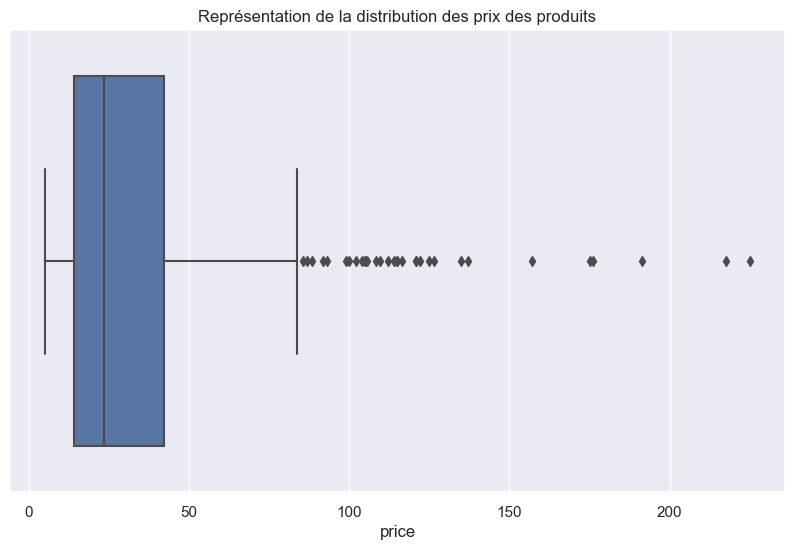

In [87]:
plt.figure(figsize=(10,6))
sns.set_theme()
sns.boxplot(x=resultat['price'])
plt.title("Représentation de la distribution des prix des produits")
plt.xlabel('price', fontsize=12)
plt.show()

### 2) Calcul de l'écart interquartile

In [88]:
#Detection des outliers; Méthode interquartile
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
Q1, Q3

(14.1, 42.175000000000004)

In [89]:
#IQR = Quartile3 – Quartile1
IQR = Q3 - Q1
IQR

28.075000000000003

In [90]:
# Tout point de données en dehors de Q3+1,5*IQR ou Q1–1,5*IQR est considéré comme une valeur aberrante.
limite_inférieure = Q1 - 1.5*IQR
limite_supérieure = Q3 + 1.5*IQR
limite_inférieure, limite_supérieure

(-28.012500000000003, 84.28750000000001)

In [91]:
# Afficher les données considérées comme des outliers, c'est à dire en dessous de notre limite inférieure et au dessus de notre limite_supérieure

data[(data.price>limite_supérieure) | (data.price<limite_inférieure)]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,product_name,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_turnover
154,4115,1,100.0,11,instock,15382,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",publish,closed,closed,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
156,4132,1,88.4,5,instock,11668,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,publish,closed,closed,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
291,4352,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,5.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
293,4355,1,126.5,2,instock,12589,0.0,0.0,0.0,0.0,11.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
297,4359,1,85.6,0,outofstock,13853,0.0,0.0,0.0,0.0,1.0,taxable,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,publish,closed,closed,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6
310,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,13.0,taxable,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
311,4404,1,108.5,2,instock,3507,0.0,0.0,0.0,0.0,2.0,taxable,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",publish,closed,closed,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0
313,4406,1,157.0,3,instock,7819,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,publish,closed,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
314,4407,1,104.0,6,instock,3509,0.0,0.0,0.0,0.0,1.0,taxable,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,publish,closed,closed,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0
320,4582,1,109.6,7,instock,12857,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,clos

### 3) Méthode du Z-score

In [92]:
zscore = data.copy()

In [93]:
zscore.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,product_name,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_turnover
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [94]:
# Ajout d'une colonne zscore price a l'aide du calcul Z-score = (Prix du produit - Moyenne) / écart type
zscore['z_score_price'] = (zscore.price - zscore.price.mean())/zscore.price.std()

In [95]:
# On affiche l'id du produit, son prix et le z-score associé
zscore[['product_id', 'price', 'z_score_price']].head()

,product_id,price,z_score_price
0,3847,24.2,-0.298201
1,3849,34.3,0.064970
2,3850,20.8,-0.420457
3,4032,14.1,-0.661373
4,4039,46.0,0.485674


In [96]:
# On selectionne que les lignes qui ont un z-score inférieur à -2 ou supèrieur à 2
erp_zscore_outliers = zscore.loc[(zscore['z_score_price'] < -2) | (zscore['z_score_price'] > 2)]

In [98]:
erp_zscore_outliers.shape

(30, 31)

In [97]:
# On affiche la liste des prix considérés comme des outliers
erp_zscore_outliers['price']

154    100.0
156     88.4
291    225.0
293    126.5
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64